# **Prodigy_ML_04**

# **Hand Gesture Recognition for Intuitive Human-Computer Interaction**

**Project Aim:**

To develop a machine learning model that accurately recognizes and classifies different hand gestures from images or video data, enabling seamless human-computer interaction and gesture-based control systems.

**Problem Statement:**

Traditional input methods can be restrictive, whereas hand gesture recognition enables seamless, contactless interaction. This project aims to develop a machine learning model that accurately classifies hand gestures, enhancing accessibility and smart control systems.


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:30<00:00, 93.7MB/s]
100% 2.13G/2.13G [00:30<00:00, 75.5MB/s]


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the unzipped dataset
dataset_path = '/content/leapgestrecog'

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust based on number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 355s 352ms/step - accuracy: 0.5022 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 373s 343ms/step - accuracy: 0.5056 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 384s 345ms/step - accuracy: 0.5030 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 384s 384ms/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 407s 349ms/step - accuracy: 0.4969 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 383s 350ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 345s 345ms/step - accuracy: 0.4983 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 418s 381ms/step - ac

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')


250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 172ms/step - accuracy: 0.5012 - loss: 0.6932
Validation Accuracy: 50.00%


In [ ]:
# Save the model in HDF5 format explicitly
model.save('/content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5')

# Print confirmation message
print(f'Model saved successfully at /content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5')

Model saved successfully at /content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List files in your Google Drive directory
drive_dir = '/content/drive/My Drive/path_to_save_model/'
files_in_drive = os.listdir(drive_dir)
print(files_in_drive)  # Ensure 'gesture_recognition_model.h5' is listed


In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model from Google Drive
model_path = '/content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5'
model = load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,460 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

# Function to upload and predict
def upload_and_predict():
    try:
        # Upload file and get file path
        uploaded = files.upload()
        file_path = list(uploaded.keys())[0]  # Assuming only one file is uploaded

        # Load uploaded image or video frame
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (if needed)
        img = cv2.resize(img, (64, 64))  # Resize image to model's input shape
        img = img.astype('float32') / 255.0  # Normalize pixel values
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Predict gesture
        predictions = model.predict(img)
        class_index = np.argmax(predictions)
        class_label = class_labels[class_index]

        # Display uploaded image and prediction
        display(Image(file_path))
        print("Predicted Gesture:", class_label)

    except Exception as e:
        print(f"Error: {str(e)}")

In [ ]:
# Define class labels
class_labels = {
    0: 'Fist',
    1: 'Five',
    2: 'Point',
    3: 'Swing',
    4: 'Ok',
    5: 'Peace',
    6: 'Rock',
    7: 'Thumb'
}

Saving ok.jpeg to ok (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


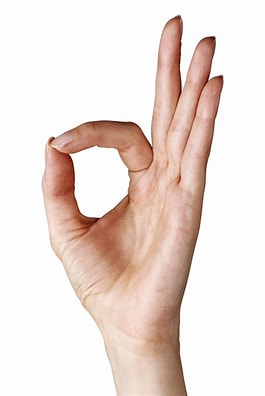

Predicted Gesture: Fist


In [ ]:
# Run the function
upload_and_predict()

**Conclusion:**

The developed model successfully recognizes hand gestures, enabling intuitive human-computer interaction. Future improvements with deep learning can enhance accuracy and adaptability for real-world applications.

## **By MANASI SAWANT**